In [81]:
import matplotlib.pyplot as plt
import numpy as np
from queue import deque

In [82]:
n=31
data = []
biggest = -99987654321
biggestY=0
biggestX=0
with open('31x31_potential.txt', 'r') as f:
    
    for j in range(31):
        tmp = []
        for i in range(8):
            line = f.readline()
            line = line.replace('[', "")
            line = line.replace(']', "")
            line = line.replace('\n', "")
            a = line.strip().split(" ")
            for b in a:
                tmp.append(float(b))
                biggest = max(biggest, float(b))
             
        data.append(tmp)
    
    data.reverse()

    print(data)
    print(len(data))
    print(len(data[0]))
    print(biggest)


[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.53553391, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.00066145447, 0.00133865358, 0.00204872811, 0.00281153509, 0.00365154501, 0.00460050352, 0.00570142426, 0.00701487247, 0.00862928627, 0.0106786785, 0.0133744649, 0.0170658552, 0.0223618339, 0.0303961231, 0.0434528403, 0.0665877806, 0.112265482, 0.214996039, 0.482000036, 1.28342267, 0.481338768, 0.213657659, 0.110217034, 0.0637764744, 0.0398014372, 0.0257956628, 0.0166603661, 0.0100508881, 0.00474509131, 0.0], [0.0, 0.0013069316, 0.00264408778, 0.00404427349, 0.00554531678, 0.00719349784, 0.00904831616, 0.0111895162, 0.013727908, 0.0168226664, 0.0207099898, 0.0257523182, 0.0325260914, 0.0419843151, 0.0557687762, 0.0768264266, 0.110631792, 0.167477131, 0.265717708, 0.42958056, 0.634817139, 0.428274002, 0.263074168, 0.163433418, 0.105086933, 0.0696332126, 0.0467205464, 0.0307947117, 0.0187979941, 0.00892947716, 0.0], [0

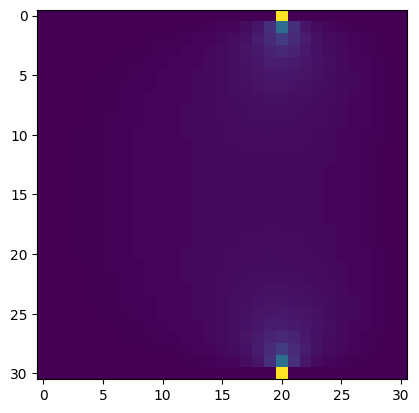

In [83]:

plt.imshow(data)

[0.0, 0.03571246373737374, 0.07142492747474748, 0.10713739121212121, 0.14284985494949495, 0.1785623186868687, 0.21427478242424242, 0.24998724616161616, 0.2856997098989899, 0.32141217363636365, 0.3571246373737374, 0.39283710111111114, 0.42854956484848483, 0.4642620285858586, 0.4999744923232323, 0.5356869560606061, 0.5713994197979798, 0.6071118835353535, 0.6428243472727273, 0.678536811010101, 0.7142492747474748, 0.7499617384848485, 0.7856742022222223, 0.821386665959596, 0.8570991296969697, 0.8928115934343435, 0.9285240571717172, 0.964236520909091, 0.9999489846464646, 1.0356614483838384, 1.0713739121212122, 1.1070863758585858, 1.1427988395959596, 1.1785113033333334, 1.214223767070707, 1.2499362308080808, 1.2856486945454546, 1.3213611582828284, 1.357073622020202, 1.3927860857575758, 1.4284985494949496, 1.4642110132323232, 1.499923476969697, 1.5356359407070708, 1.5713484044444446, 1.6070608681818181, 1.642773331919192, 1.6784857956565657, 1.7141982593939393, 1.7499107231313131, 1.7856231868

AttributeError: Polygon.set() got an unexpected keyword argument 'cmap'

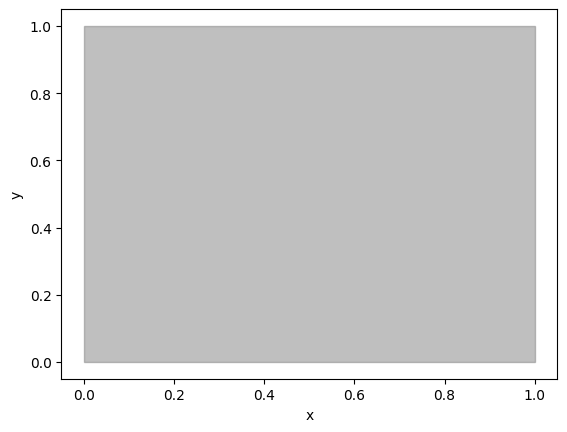

In [76]:
plt.xlabel('x')
plt.ylabel('y')
plt.fill([0,0,1,1],[0,1,1,0],color='gray', alpha=0.5)

colors = [(0, 'purple'),(1, 'yellow')]
cmap_name = 'my_color_map'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

for y in range(30):
    for x in range(30):
        plt.fill([x,x,x+1,x+1], [y,y+1,y+1,y], cmap=cmap)


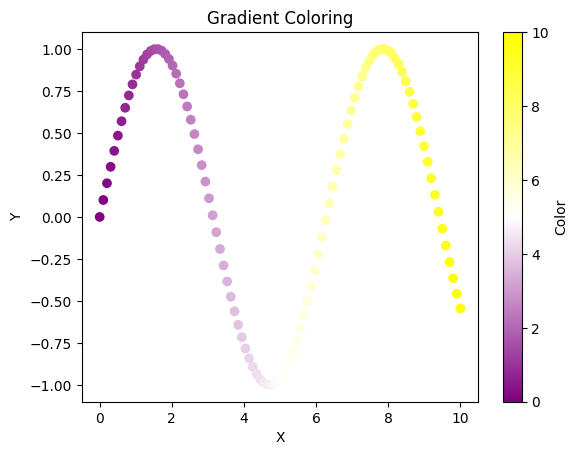

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# 데이터 생성
x = np.linspace(0, 10, 100)
y = np.sin(x)

# 색상 맵 생성
colors = [(0, 'purple'), (0.5, 'white'), (1, 'yellow')]
cmap_name = 'my_color_map'
cmap = LinearSegmentedColormap.from_list(cmap_name, colors)

# 그래프 그리기
plt.scatter(x, y, c=x, cmap=cmap)
plt.colorbar(label='Color')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Gradient Coloring')
plt.show()



In [78]:
import numpy as np

# Constants
sigma = 1e6
Z = 1 / 1e6
Lx = 30
Ly = 30
dx = 1
dy = 1
tolerance = 1e-5
max_iter = 10000

# Function to calculate ∂ϕ/∂x at a given point
def partial_x(phi, i, j):
    return (phi[i+1, j] - phi[i-1, j]) / (2 * dx)

# Function to calculate ∂ϕ/∂y at a given point
def partial_y(phi, i, j):
    return (phi[i, j+1] - phi[i, j-1]) / (2 * dy)

# Initialize potential array
phi = np.zeros((Lx+1, Ly+1))

# Boundary conditions
phi[0, :] = 0  # ϕ = 0 at x=0
phi[10:21, 10] = 10 / (2 * np.sqrt(2)) + sigma * Z * partial_y(phi, 10, 10)
phi[10:21, 18] = 10 / (2 * np.sqrt(2)) + sigma * Z * partial_y(phi, 10, 18)
phi[20, 10:19] = 10 / (2 * np.sqrt(2)) + sigma * Z * partial_x(phi, 20, 10)
phi[29, 10:19] = 10 / (2 * np.sqrt(2)) + sigma * Z * partial_x(phi, 29, 10)
phi[:, 30] = 0  # ϕ = 0 at y=30
phi[0:21, 20] = 10 / (2 * np.sqrt(2)) + sigma * Z * partial_y(phi, 0, 20)
phi[20:31, 20] = 10 / (2 * np.sqrt(2)) + sigma * Z * partial_y(phi, 20, 20)

# Main loop for solving Laplace equation
for _ in range(max_iter):
    prev_phi = np.copy(phi)
    for i in range(1, Lx):
        for j in range(1, Ly):
            if (i < 10 or i > 20) and j == 20:
                phi[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) / 4
            elif i == 10 and (j < 10 or j > 18):
                phi[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) / 4
            elif i == 20 and (j < 10 or j > 18):
                phi[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) / 4
            else:
                phi[i, j] = (phi[i+1, j] + phi[i-1, j] + phi[i, j+1] + phi[i, j-1]) / 4
    # Check for convergence
    if np.allclose(phi, prev_phi, atol=tolerance):
        break

print(phi)


[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.53553391e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 6.63224228e-04 1.34215445e-03 2.05390294e-03
  2.81830910e-03 3.65982673e-03 4.61018604e-03 5.71238653e-03
  7.02698076e-03 8.64239580e-03 1.06926352e-02 1.33891069e-02
  1.70810152e-02 2.23773405e-02 3.04118032e-02 4.34685206e-02
  6.66032898e-02 1.12280652e-01 2.15010709e-01 4.82014050e-01
  1.28343588e+00 4.81351043e-01 2.13668873e-01 1.10227076e-01
  6.37852474e-02 3.98088592e-02 2.58016673e-02 1.66649031e-02
  1.00539239e-02 4.74660924e-03 0.00000000e+00]
 [0.00000000e+00 1.31019978e-03 2.65